<a href="https://colab.research.google.com/github/sartansartan/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/ASartan_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#Write a function def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk) 
#that reproduces the example from lecture

In [0]:
def bayes_theorem(prior, false_neg, false_pos):
    return false_pos * prior / false_neg

In [99]:
bayes_theorem(prior=0.001, false_neg=0.08, false_pos=1)

0.0125

In [0]:
#Use a function to calculate and visualize a range of situations

In [0]:
posterior = [bayes_theorem(prior, false_neg=0.08, false_pos=1) for prior in np.linspace(0, 1, 100)]

In [89]:
posterior

[0.0,
 0.12626262626262627,
 0.25252525252525254,
 0.3787878787878788,
 0.5050505050505051,
 0.6313131313131314,
 0.7575757575757576,
 0.883838383838384,
 1.0101010101010102,
 1.1363636363636365,
 1.2626262626262628,
 1.388888888888889,
 1.5151515151515151,
 1.6414141414141414,
 1.767676767676768,
 1.893939393939394,
 2.0202020202020203,
 2.1464646464646466,
 2.272727272727273,
 2.3989898989898992,
 2.5252525252525255,
 2.6515151515151514,
 2.777777777777778,
 2.9040404040404044,
 3.0303030303030303,
 3.1565656565656566,
 3.282828282828283,
 3.4090909090909096,
 3.535353535353536,
 3.6616161616161613,
 3.787878787878788,
 3.9141414141414144,
 4.040404040404041,
 4.166666666666667,
 4.292929292929293,
 4.41919191919192,
 4.545454545454546,
 4.671717171717172,
 4.7979797979797985,
 4.924242424242425,
 5.050505050505051,
 5.176767676767677,
 5.303030303030303,
 5.429292929292929,
 5.555555555555556,
 5.6818181818181825,
 5.808080808080809,
 5.934343434343435,
 6.0606060606060606,
 6.18686

In [0]:
import seaborn as sns

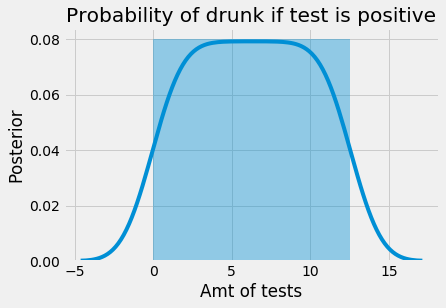

In [81]:
ax = sns.distplot(posterior);
ax.set_title('Probability of drunk if test is positive');
ax.set_ylabel('Posterior');
ax.set_xlabel('Amt of tests');

In [0]:
#Explore scipy.stats.bayes_mvs - read its documentation, 
#and experiment with it on data you've tested in other ways earlier this week

In [0]:
from scipy import stats

In [18]:
help(stats.bayes_mvs)

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

In [20]:
from google.colab import files
uploaded = files.upload()

Saving house-votes-84.data to house-votes-84.data


In [23]:
df = pd.read_csv("house-votes-84.data", header=None)
df.columns = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing', 
           'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 
           'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
           'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 
           'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']
df = df.replace({"n":0, "y":int('1'), '?': np.NaN})
df = df.dropna()
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [0]:
df_rep = df[df['Class Name'] == 'republican']
df_dem = df[df['Class Name'] == 'democrat']

In [0]:
df_dem_copy = df_dem.drop(columns=['Class Name'])

In [41]:
mean_d ,_,_ = stats.bayes_mvs(df_dem_copy.astype(float), alpha=.95)
stats.bayes_mvs(df_dem_copy, alpha=.95)

(Mean(statistic=0.5201612903225806, minmax=(0.4981779384138709, 0.5421446422312903)),
 Variance(statistic=0.24959352237252858, minmax=(0.2340615873512532, 0.26512545739380394)),
 Std_dev(statistic=0.49959335701401053, minmax=(0.4840487798061517, 0.5151379342218694)))

In [40]:
mean_d

Mean(statistic=0.5201612903225806, minmax=(0.4981779384138709, 0.5421446422312903))

In [0]:
columns = ['handicapped-infants', 'water-project-cost-sharing', 
           'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 
           'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
           'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 
           'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']

In [0]:
bayes_dem = []
for col in columns:
  mean, var, std = stats.bayes_mvs(df_dem_copy[col], alpha=.95)
  mean = [mean.statistic, mean.minmax[0], mean.minmax[1]]
  bayes_dem.append(mean)

In [77]:
bayes_dem

[[0.5887096774193549, 0.5008854514528095, 0.6765339033859002],
 [0.45161290322580644, 0.3627917755681809, 0.540434030883432],
 [0.8548387096774194, 0.791966749899413, 0.9177106694554258],
 [0.04838709677419355, 0.010088360711719258, 0.08668583283666784],
 [0.20161290322580644, 0.13000591391201893, 0.27321989253959394],
 [0.4435483870967742, 0.3548790007497182, 0.5322177734438303],
 [0.7661290322580645, 0.6905800506734978, 0.8416780138426312],
 [0.8306451612903226, 0.7637035637475735, 0.8975867588330717],
 [0.7903225806451613, 0.7176672431336555, 0.862977918156667],
 [0.532258064516129, 0.44320399355877216, 0.6213121354734858],
 [0.5080645161290323, 0.41883613678222775, 0.5972928954758367],
 [0.12903225806451613, 0.0691994091855297, 0.18886510694350256],
 [0.2903225806451613, 0.20930852028655042, 0.37133664100377217],
 [0.3467741935483871, 0.26182787733541646, 0.4317205097613578],
 [0.5967741935483871, 0.5092216687100866, 0.6843267183866877],
 [0.9435483870967742, 0.9023566825660085, 0.

In [79]:
df_bayes_dem = pd.DataFrame(data=bayes_dem, index = columns, columns = ['mean_cntr', 'mean_lower', 'mean_upper'])
df_bayes_dem.head()

,mean_cntr,mean_lower,mean_upper
handicapped-infants,0.588710,0.500885,0.676534
water-project-cost-sharing,0.451613,0.362792,0.540434
adoption-of-the-budget-resolution,0.854839,0.791967,0.917711
physician-fee-freeze,0.048387,0.010088,0.086686
el-salvador-aid,0.201613,0.130006,0.273220


In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  interval = stderr * t
  return (mean, mean - interval, mean + interval)

In [0]:
columns = ['handicapped-infants', 'water-project-cost-sharing', 
           'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 
           'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
           'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 
           'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']

In [0]:
conf_dem = []
for col in columns:
  m = confidence_interval(df_dem[col])
  conf_dem.append(m)

In [29]:
df_final_dem = pd.DataFrame(data=conf_dem, index = columns, columns = ['mean', 'mean_MIN_interval', 'mean_PLU_interval'])
df_final_dem.head()

,mean,mean_MIN_interval,mean_PLU_interval
handicapped-infants,0.588710,0.500885,0.676534
water-project-cost-sharing,0.451613,0.362792,0.540434
adoption-of-the-budget-resolution,0.854839,0.791967,0.917711
physician-fee-freeze,0.048387,0.010088,0.086686
el-salvador-aid,0.201613,0.130006,0.273220


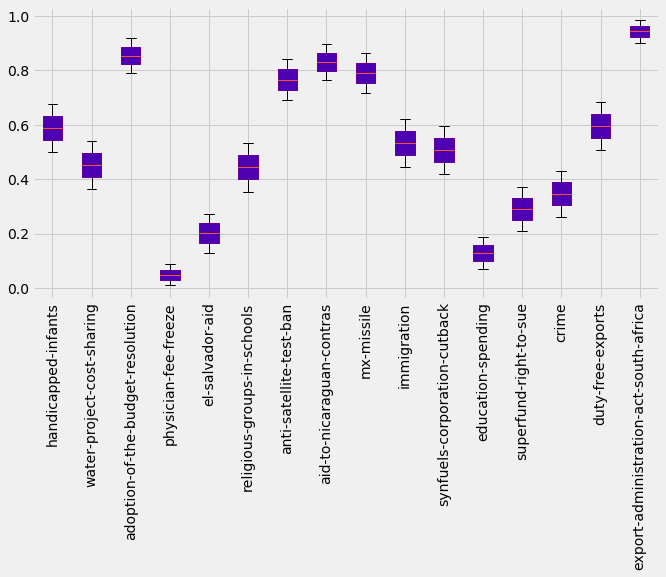

In [96]:
import matplotlib.pyplot as plt
import matplotlib.style as style

fig, axes = plt.subplots(figsize=(10, 5))

ax1 = axes.boxplot(df_final_dem,
                      patch_artist=True)
plt.setp(ax1['boxes'], color='blue')

ax2 = axes.boxplot(df_bayes_dem,
                       patch_artist=True)  
plt.setp(ax2['boxes'], color='red', alpha=0.3)

axes.set_xticklabels(columns, rotation = 90);




# fig, axes = plt.subplots(figsize=(10, 6))
# ax1 = axes.boxplot(df_final_dem);

# # fig2, ax2 = plt.subplots(figsize=(10, 6))
# # ax2.boxplot(data_rep)

# # ax1.set_title('Confidence interval of democrats')
# # ax1.set_xlabel('Issue')
# # ax1.set_ylabel('Mean')

# ax2 = axes.boxplot(df_bayes_dem);
# # ax2.set_title('Confidence interval of republicans')
# # ax2.set_xlabel('Issue')
# # ax2.set_ylabel('Mean')

# # xtickNames = plt.setp(ax1, xticklabels=columns)
# # plt.setp(xtickNames, rotation=80, fontsize=10)

# # xtickNames = plt.setp(ax2, xticklabels=columns)
# # plt.setp(xtickNames, rotation=80, fontsize=10)

style.use('fivethirtyeight')

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)